In [1]:
# packages for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
import os

# Data Preprocessing
from sklearn import preprocessing,metrics
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression
from imblearn.over_sampling import SMOTE

# Model Evaluation
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score
import xgboost as xgb


In [2]:
df  = pd.read_csv('train.csv')

In [3]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [4]:

# Set the display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
C

In [5]:

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculating the percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Display the result
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
ID                          0.0
Customer_ID                 0.0
Month                       0.0
Name                        0.0
Age                         0.0
SSN                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Type_of_Loan                0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64


In [6]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

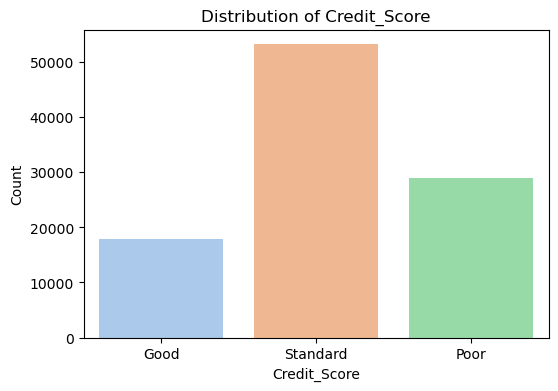

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_Score', data=df,palette='pastel')
plt.title('Distribution of Credit_Score')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

In [8]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["ID", "Customer_ID", "Name", "SSN"], errors="ignore")

In [9]:
# Convert categorical features into numerical form
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns
df_encoded = df_cleaned.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

In [10]:
# Drop highly correlated features
df_final = df_encoded.drop(columns=["Monthly_Inhand_Salary", "Amount_invested_monthly"], errors="ignore")

In [11]:
# Define features and target
X = df_final.drop(columns=["Credit_Score"])
y = df_final["Credit_Score"]

In [12]:
# Perform oversampling for class balance
df_good = df_final[df_final["Credit_Score"] == 0]
df_standard = df_final[df_final["Credit_Score"] == 1]
df_poor = df_final[df_final["Credit_Score"] == 2]

In [13]:
# Perform oversampling for class balance
from sklearn.utils import resample
df_good = df_final[df_final["Credit_Score"] == 0]
df_standard = df_final[df_final["Credit_Score"] == 1]
df_poor = df_final[df_final["Credit_Score"] == 2]

max_samples = df_standard.shape[0]

df_good_upsampled = resample(df_good, replace=True, n_samples=max_samples, random_state=42)
df_poor_upsampled = resample(df_poor, replace=True, n_samples=max_samples, random_state=42)

df_balanced = pd.concat([df_good_upsampled, df_standard, df_poor_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_balanced = df_balanced.drop(columns=["Credit_Score"])
y_balanced = df_balanced["Credit_Score"]

In [14]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [15]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

In [16]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }
    # Print results
for model, metrics in results.items():
    print(f"\n{model} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])


Random Forest Results:
Accuracy: 0.8982
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      5799
           1       0.90      0.91      0.90      5800
           2       0.90      0.81      0.85      5800

    accuracy                           0.90     17399
   macro avg       0.90      0.90      0.90     17399
weighted avg       0.90      0.90      0.90     17399


XGBoost Results:
Accuracy: 0.8169
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      5799
           1       0.84      0.84      0.84      5800
           2       0.81      0.69      0.74      5800

    accuracy                           0.82     17399
   macro avg       0.82      0.82      0.81     17399
weighted avg       0.82      0.82      0.81     17399



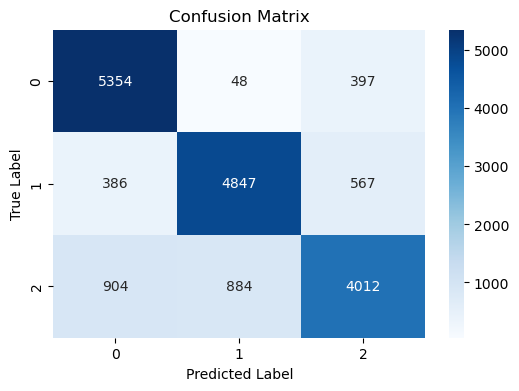

In [17]:
# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


📌 Random Forest Results:
Accuracy: 0.8982

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      5799
           1       0.90      0.91      0.90      5800
           2       0.90      0.81      0.85      5800

    accuracy                           0.90     17399
   macro avg       0.90      0.90      0.90     17399
weighted avg       0.90      0.90      0.90     17399


Confusion Matrix:
 [[5641   12  146]
 [ 109 5305  386]
 [ 511  607 4682]]


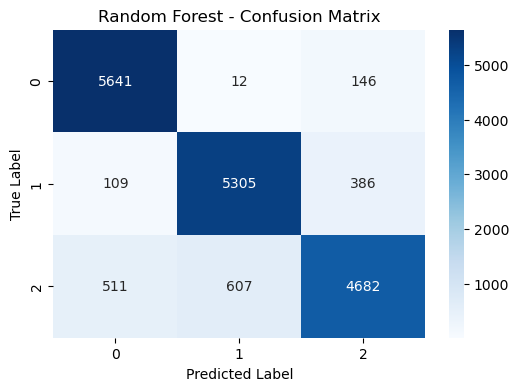


📌 XGBoost Results:
Accuracy: 0.8169

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      5799
           1       0.84      0.84      0.84      5800
           2       0.81      0.69      0.74      5800

    accuracy                           0.82     17399
   macro avg       0.82      0.82      0.81     17399
weighted avg       0.82      0.82      0.81     17399


Confusion Matrix:
 [[5354   48  397]
 [ 386 4847  567]
 [ 904  884 4012]]


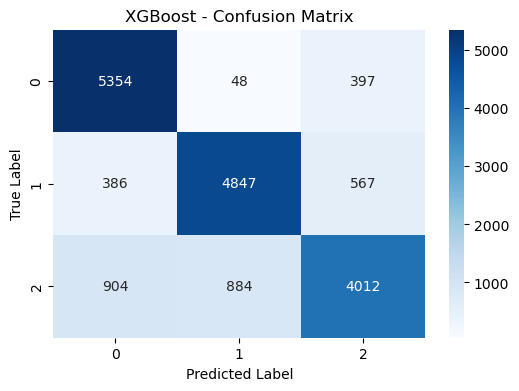

In [18]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": conf_matrix
    }

# Print results
for model, metrics in results.items():
    print(f"\n📌 {model} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("\nClassification Report:\n", metrics["Classification Report"])
    print("\nConfusion Matrix:\n", metrics["Confusion Matrix"])

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model} - Confusion Matrix")
    plt.show()

In [19]:
# Train and evaluate models with Cross-Validation
from sklearn.model_selection import train_test_split, cross_val_score
results = {}
for name, model in models.items():
    # Perform cross-validation (5 folds)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    
    # Train on full training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Cross-Validation Mean Accuracy": cv_scores.mean(),
        "Cross-Validation Std Dev": cv_scores.std(),
        "Test Set Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

# Print results
for model, metrics in results.items():
    print(f"\n{model} Results:")
    print(f"Cross-Validation Mean Accuracy: {metrics['Cross-Validation Mean Accuracy']:.4f}")
    print(f"Cross-Validation Std Dev: {metrics['Cross-Validation Std Dev']:.4f}")
    print(f"Test Set Accuracy: {metrics['Test Set Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])


Random Forest Results:
Cross-Validation Mean Accuracy: 0.8880
Cross-Validation Std Dev: 0.0026
Test Set Accuracy: 0.8982
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      5799
           1       0.90      0.91      0.90      5800
           2       0.90      0.81      0.85      5800

    accuracy                           0.90     17399
   macro avg       0.90      0.90      0.90     17399
weighted avg       0.90      0.90      0.90     17399


XGBoost Results:
Cross-Validation Mean Accuracy: 0.8153
Cross-Validation Std Dev: 0.0040
Test Set Accuracy: 0.8169
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      5799
           1       0.84      0.84      0.84      5800
           2       0.81      0.69      0.74      5800

    accuracy                           0.82     17399
   macro avg       0.82      0.82      0.81     17399
weighted 